In [1]:
import matplotlib.pyplot as plt


In [2]:
x = [i for i  in range(10)]

In [3]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
y = [ 2*i for i in range(10)]

In [5]:
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


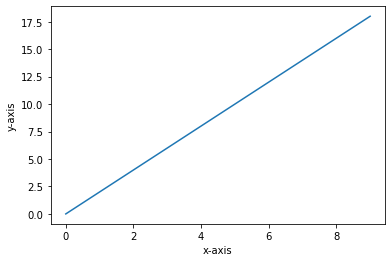

In [6]:
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y)

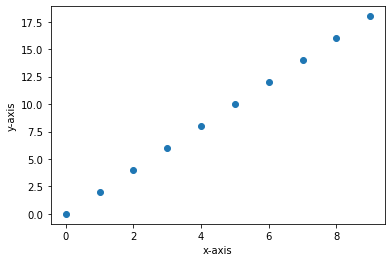

In [7]:
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.scatter(x,y)

# train_test_split

In [8]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
iris = datasets.load_iris()

In [10]:
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# KNN Example

In [13]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
 data = pd.read_csv("car.data")
    
    

In [15]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [16]:
X = data[["buying","maint","safety"]].values
y = data[["class"]]
print(X,y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [17]:
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:,i] = Le.fit_transform(X[:,i])

print(X)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [18]:
label_mapping = {
    "unacc":0,
    "acc":1,
    "good":2,
    "vgood":3
     
}
y["class"] = y["class"].map(label_mapping)
print(y)
y = np.array(y)
print(y)
  

      class
0         0
1         0
2         0
3         0
4         0
...     ...
1723      2
1724      3
1725      0
1726      2
1727      3

[1728 rows x 1 columns]
[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


<ipython-input-18-6bb526cea39f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].map(label_mapping)


# create model

In [19]:
knn =neighbors.KNeighborsClassifier(n_neighbors=25,weights = "uniform")


In [20]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
print(X_train)

[[2 1 1]
 [3 3 1]
 [2 0 0]
 ...
 [3 1 0]
 [1 1 2]
 [0 3 0]]


In [22]:
knn.fit(X_train,y_train)

<ipython-input-22-889312abc571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [23]:
prediction = knn.predict(X_test)

In [24]:
accuracy = metrics.accuracy_score(y_test,prediction)
print("prediction: ",prediction)
print("accuracy: ",accuracy)

prediction:  [0 3 0 0 1 0 0 3 1 0 0 1 3 3 1 0 1 0 0 0 0 2 0 0 3 3 0 3 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 3 1 0 0 1 0 1 0 0 0
 3 1 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 3 0 1 0 0 1 0 0 0 0 0 0 0 3 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 3 0 0 0 0 3 0 1 0 0 0 0 0 0 3 0 0 1 1 3 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 1 0 3 3 0 0 3 0 1 0 0 0 1 0 1 2 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 3 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 3 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 3 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 3 0 0 3 0 1 0 0 0 3 1 3 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 1 1 0]
accuracy:  0.6936416184971098


In [26]:
a = 100 
print("actual value:",y[a])
print("predicetd value:",knn.predict(X)[a])


actual value: [0]
predicetd value: 0


# SVM

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import svm


In [29]:

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [31]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [32]:
classes = ["Iris Setosa","Iris Versicolor","Iris Verginica"]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [38]:
model = svm.SVC()
print(model)

SVC()


In [39]:
model.fit(X_train,y_train)

SVC()

In [44]:
predictions = model.predict(X_test)


In [45]:
acc = accuracy_score(y_test,prediction)

In [46]:
acc

0.9333333333333333

In [47]:
actual = y_test

In [49]:
print(actual)
print(predictions)
print(acc)

[1 0 1 0 1 2 2 0 1 0 2 0 2 2 1 2 1 0 0 2 2 0 2 2 2 2 1 1 2 1]
[1 0 1 0 1 2 2 0 1 0 1 0 2 2 1 2 1 0 0 2 1 0 2 2 2 2 1 1 2 1]
0.9333333333333333


In [66]:
print("  Predicted","           ","Actual")
for i in range(len(predictions)):
    print(classes[predictions[i]]," - ",classes[actual[i]])

  Predicted             Actual
Iris Versicolor  -  Iris Versicolor
Iris Setosa  -  Iris Setosa
Iris Versicolor  -  Iris Versicolor
Iris Setosa  -  Iris Setosa
Iris Versicolor  -  Iris Versicolor
Iris Verginica  -  Iris Verginica
Iris Verginica  -  Iris Verginica
Iris Setosa  -  Iris Setosa
Iris Versicolor  -  Iris Versicolor
Iris Setosa  -  Iris Setosa
Iris Versicolor  -  Iris Verginica
Iris Setosa  -  Iris Setosa
Iris Verginica  -  Iris Verginica
Iris Verginica  -  Iris Verginica
Iris Versicolor  -  Iris Versicolor
Iris Verginica  -  Iris Verginica
Iris Versicolor  -  Iris Versicolor
Iris Setosa  -  Iris Setosa
Iris Setosa  -  Iris Setosa
Iris Verginica  -  Iris Verginica
Iris Versicolor  -  Iris Verginica
Iris Setosa  -  Iris Setosa
Iris Verginica  -  Iris Verginica
Iris Verginica  -  Iris Verginica
Iris Verginica  -  Iris Verginica
Iris Verginica  -  Iris Verginica
Iris Versicolor  -  Iris Versicolor
Iris Versicolor  -  Iris Versicolor
Iris Verginica  -  Iris Verginica
Iris Versicol

# Linea Regression

In [97]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [98]:
boston = datasets.load_boston()


In [99]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [100]:
X = boston.data
y = boston.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [93]:
print(type(X))

<class 'numpy.ndarray'>


In [94]:
lr = linear_model.LinearRegression()

In [96]:
print(X.T[0].shape)

(506,)


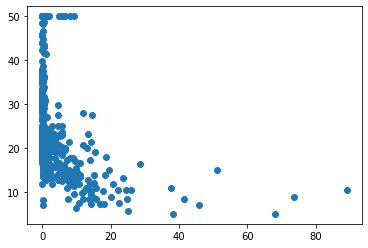

In [101]:
plt.scatter(X.T[0],y)

In [102]:
print(X.shape)

(506, 13)


In [103]:
print(X.T.shape)

(13, 506)


In [104]:
y.shape

(506,)